In [1]:
!ls

ipy.ipy
notes.txt
rbfinterp_time.gonzales.jax.numpy.cpu.jit.txt
rbfinterp_time.gonzales.jax.numpy.cpu.nojit.txt
rbfinterp_time.gonzales.numpy.cpu.jit.txt
rbfinterp_time.gonzales.numpy.cpu.nojit.txt
rbfinterp_time.gonzales.torch.cpu.jit.txt
rbfinterp_time.gonzales.torch.cpu.nojit.txt
rbfinterp_time.qgpu3.jax.numpy.cpu.jit.txt
rbfinterp_time.qgpu3.jax.numpy.cpu.nojit.txt
rbfinterp_time.qgpu3.numpy.cpu.jit.txt
rbfinterp_time.qgpu3.numpy.cpu.nojit.txt
rbfinterp_time.qgpu3.torch.cpu.jit.txt
rbfinterp_time.qgpu3.torch.cpu.nojit.txt
timings_cpu.ipynb


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols = ["N", "time", "stdev"]

df = pd.DataFrame(columns=cols + ["machine", "backend", "jit"])
for machine in ["gonzales", "qgpu3"]:
    for backend in ["numpy", "torch", "jax.numpy"]:
        for jit in ["nojit", "jit"]:
            fname = f"rbfinterp_time.{machine}.{backend}.cpu.{jit}.txt"
            df_ = pd.read_csv(fname, names=cols, skiprows=1)
            df_["machine"] = machine
            df_["backend"] = backend
            df_["jit"] = jit
            if df.empty:
                df = df_
            else:
                df = pd.concat([df, df_], ignore_index=True)

# rename values 
df.loc[ df["jit"] == "nojit", "jit" ] = "eager"
df

,N,time,stdev,machine,backend,jit
0,50,0.003285,0.000026,gonzales,numpy,eager
1,100,0.014319,0.000371,gonzales,numpy,eager
2,500,0.362855,0.005375,gonzales,numpy,eager
3,1000,1.885408,0.038352,gonzales,numpy,eager
4,2000,8.781389,0.408250,gonzales,numpy,eager
5,50,0.009429,0.000454,gonzales,numpy,jit
6,100,0.038029,0.000900,gonzales,numpy,jit
7,500,0.982522,0.027611,gonzales,numpy,jit
8,1000,4.326344,0.168635,gonzales,numpy,jit
9,2000,19.374657,0.221027,gonzales,numpy,jit


### Base timings, numpy/pythran

In [4]:
df_np = df.loc[(df["backend"] == "numpy") & (df["jit"] == "eager") ]
df_np

,N,time,stdev,machine,backend,jit
0,50,0.003285,0.000026,gonzales,numpy,eager
1,100,0.014319,0.000371,gonzales,numpy,eager
2,500,0.362855,0.005375,gonzales,numpy,eager
3,1000,1.885408,0.038352,gonzales,numpy,eager
4,2000,8.781389,0.408250,gonzales,numpy,eager
30,50,0.003009,0.000001,qgpu3,numpy,eager
31,100,0.022632,0.000199,qgpu3,numpy,eager
32,500,0.569748,0.004846,qgpu3,numpy,eager
33,1000,2.268105,0.006025,qgpu3,numpy,eager
34,2000,8.117150,0.015577,qgpu3,numpy,eager


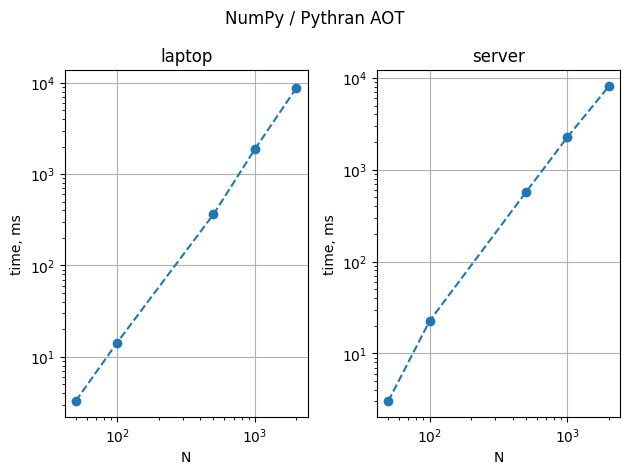

In [5]:
fig, axx = plt.subplots(1, 2)

df__ = df_np.loc[df["machine"] == "gonzales"]
axx[0].errorbar(df__["N"], df__["time"]*1000, yerr=df__["stdev"]*1000, fmt='o--')
axx[0].set_yscale("log")
axx[0].set_xscale("log")

axx[0].set_xlabel("N")
axx[0].set_ylabel("time, ms")
axx[0].grid(True)
axx[0].set_title("laptop")

df__ = df_np.loc[df["machine"] == "qgpu3"]
axx[1].errorbar(df__["N"], df__["time"]*1000, yerr=df__["stdev"]*1000, fmt='o--')
axx[1].set_yscale("log")
axx[1].set_xscale("log")

axx[1].set_xlabel("N")
axx[1].set_ylabel("time, ms")
axx[1].grid(True)
axx[1].set_title("server")

fig.suptitle("NumPy / Pythran AOT")
plt.tight_layout()

### Speedups w.r.t. numpy/pythran AOT

In [6]:
grp_dict = df.groupby(["machine", "jit", "backend"]).groups

base_idx = grp_dict[("gonzales", "eager", "numpy")]
base_gonz = df.iloc[base_idx]
base_qgpu3 = df.iloc[ grp_dict[("qgpu3", "eager", "numpy")] ]

print(base_gonz)
print(base_qgpu3)

      N      time     stdev   machine backend    jit
0    50  0.003285  0.000026  gonzales   numpy  eager
1   100  0.014319  0.000371  gonzales   numpy  eager
2   500  0.362855  0.005375  gonzales   numpy  eager
3  1000  1.885408  0.038352  gonzales   numpy  eager
4  2000  8.781389  0.408250  gonzales   numpy  eager
       N      time     stdev machine backend    jit
30    50  0.003009  0.000001   qgpu3   numpy  eager
31   100  0.022632  0.000199   qgpu3   numpy  eager
32   500  0.569748  0.004846   qgpu3   numpy  eager
33  1000  2.268105  0.006025   qgpu3   numpy  eager
34  2000  8.117150  0.015577   qgpu3   numpy  eager


In [7]:
dfs = []

for key, idx in grp_dict.items():
    df_ = df.iloc[idx]
    base_df = base_gonz if key[0] == "gonzales" else base_qgpu3
    
    df__ = pd.concat([
                df_.set_index("N"),
                base_df.set_index("N")[["time"]].rename(columns={"time": "np_time"})
                    ], axis=1, join='inner'
           ).reset_index()
    df__["speedup"] = df__["np_time"] / df__["time"]

    dfs.append(df__)

df_ = pd.concat(dfs, ignore_index=True)
df_

,N,time,stdev,machine,backend,jit,np_time,speedup
0,50,0.004545,0.001475,gonzales,jax.numpy,eager,0.003285,0.722699
1,100,0.030022,0.002984,gonzales,jax.numpy,eager,0.014319,0.476929
2,500,0.702761,0.034966,gonzales,jax.numpy,eager,0.362855,0.516328
3,1000,2.405938,0.065812,gonzales,jax.numpy,eager,1.885408,0.783648
4,2000,10.642563,0.240547,gonzales,jax.numpy,eager,8.781389,0.825120
5,50,0.003285,0.000026,gonzales,numpy,eager,0.003285,1.000000
6,100,0.014319,0.000371,gonzales,numpy,eager,0.014319,1.000000
7,500,0.362855,0.005375,gonzales,numpy,eager,0.362855,1.000000
8,1000,1.885408,0.038352,gonzales,numpy,eager,1.885408,1.000000
9,2000,8.781389,0.408250,gonzales,numpy,eager,8.781389,1.000000


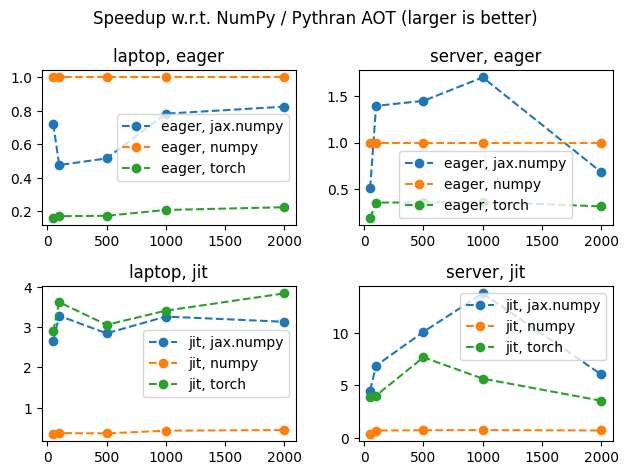

In [8]:
fix, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 8)
plt.suptitle("Speedup w.r.t. NumPy / Pythran AOT (larger is better)")

grp_dict = df_.groupby(["machine", "jit", "backend"]).groups
for key, idx in grp_dict.items():
    r = {"eager": 0, "jit": 1}[key[1]]
    c = {"gonzales": 0, "qgpu3": 1}[key[0]]
    this_df = df_.iloc[idx]
    
    ax[r][c].plot(this_df["N"], this_df["speedup"], 'o--', label=f"{key[1]}, {key[2]}")

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

ax[0, 0].set_title('laptop, eager')
ax[1, 0].set_title('laptop, jit')

ax[0, 1].set_title('server, eager')
ax[1, 1].set_title('server, jit')

plt.tight_layout()